# 3. Getting Started

* 손고리즘 / 손고리즘ML : 파트 3 - theano [1]
* 김무성    

# Contents

* 3.1 Download
* 3.2 Datasets
    - 3.2.1 MNIST Dataset
* 3.3 Notation
    - 3.3.1 Dataset notation
    - 3.3.2 Math Conventions
    - 3.3.3 List of Symbols and acronyms
* 3.4 A Primer on Supervised Optimization for Deep Learning
    - 3.4.1 Learning a Classifier
        - Zero-One Loss
        - Negative Log-Likelihood Loss
    - 3.4.2 Stochastic Gradient Descent
    - 3.4.3 Regularization
        - L1 and L2 regularization
        - Early-Stopping
    - 3.4.4 Testing
    - 3.4.5 Recap
* 3.5 Theano/Python Tips
    - 3.5.1 Loading and Saving Models
        - Pickle the numpy ndarrays from your shared variables
        - Do not pickle your training or test functions for long-term storage
    - 3.5.2 Plotting Intermediate Results

# 참고 : Docker + Jupyter 기반 환경설정

## A : 간략버전

### A.1 docker toolbox 혹은 리눅스 등의 설치 환경 구축

##### 다음 두 링크를 참조
* https://gist.github.com/haje01/0fb6d63bf065c9831256
* https://github.com/psygrammer/bayesianPy/blob/master/part4/pymc01/pymc_intro_install.ipynb

### A.2 실습용 도커 이미지 다운 & 컨테이너 실행

In [ ]:
docker pull songorithm/theano_basic
docker run -d -p 8888:8888 -e GRANT_SUDO=yes --name run_theano songorithm/theano_basic

# B : 상세버전

B 과정은 A.2의 상세 버전이다. 이렇게 직접 구축해도 되지만, A.2의 songorithm/theano_basic 이미지에 다 반영되어 있음.

### B.1 docker toolbox 혹은 리눅스 등의 설치 환경 구축

B.1은 A.1과 동일

### B.2 jupyter (ipython notebook) 도커 이미지 받음

In [ ]:
docker pull jupyter/scipy-notebook

* 다음의 문서를 참조한다. 컨테이너 실행 옵션들이 나옴 - https://github.com/jupyter/docker-stacks/tree/master/scipy-notebook

### B.3 컨테이너 실행 

In [ ]:
# 슈도유저 권한주고(권장), 
# 별명도 붙여줬음(이건 옵션)
# docker run -d -p [접속_포트]:8888 -e GRANT_SUDO=yes --name [컨테이너별명] jupyter/scipy-notebook
docker run -d -p 8888:8888 -e GRANT_SUDO=yes --name run_theano jupyter/scipy-notebook

### B.4 브라우저에서 노트북 접속 

In [ ]:
# http://docker_vm_ip:port/
# docker_vm_ip는 도커툴박스의 경우는 고래 화면 뜰때 나오는 ip
# 혹은 리눅스&맥의 경우 터미널에서 다음 명령어로 확인할 수 있다 : docker-machine ls
http://192.168.99.100:8888

<img src="https://github.com/psygrammer/bayesianPy/raw/d5d37fca7fd8f41444c9ec02ccd262d42be432b4/part4/pymc01/figures/cap1.png" width=600 />

### B.5 jupyter 노트북 환경에서 terminal 생성 & 접속

<img src="https://github.com/psygrammer/bayesianPy/raw/d5d37fca7fd8f41444c9ec02ccd262d42be432b4/part4/pymc01/figures/cap2.png" width=600 />

### B.5.1 기타 팁

* 기본은 python3

* python2로 바꾸려면

In [ ]:
source activate python2

### B.6 theano 설치

0.5에서 생성한 터미널로 접속해서 설치해보자.

In [ ]:
# (파이썬 2와 파이썬 3에 각각 해주자 - 안쓸 버전엔 안해도 되긴함)
conda install theano 

# 3.1 Download

* git clone git://github.com/lisa-lab/DeepLearningTutorials.git

In [ ]:
!ls ~/work/DeepLearningTutorials

In [ ]:
!ls ~/work/DeepLearningTutorials/code

# 3.2 Datasets

* 3.2.1 MNIST Dataset

## 3.2.1 MNIST Dataset

* mnist.pkl.gz - http://deeplearning.net/data/mnist/mnist.pkl.gz

* The MNIST dataset 
    - consists of handwritten digit images and 
        - it is divided in 
            - 60,000 examples for the training set and 
            - 10,000 examples for testing. 
    - In many papers as well as in this tutorial, 
        - the official training set of 60,000 is divided into 
            - an actual training set of 50,000 examples and 
            - 10,000 validation examples (for selecting hyper-parameters like learning rate and size of the model). 
    - All digit images have been 
        - size-normalized and 
        - centered in a fixed size image of 28 x 28 pixels. 
    - In the original dataset 
        - each pixel of the image is represented by a value 
            - between 0 and 255, where 
                - 0 is black, 
                - 255 is white and 
                - anything in between is a different shade of grey.

<img src="figures/cap3.1.png" width=600 />

### 참고 :

<img src="https://camo.githubusercontent.com/5fc30a4aed9f80b044291c67e7d27b6c7c1ab749/687474703a2f2f7777772e686f6c65686f7573652e6f72672f6d6c636c6173732f31305f4164766963655f666f725f6170706c79696e675f6d616368696e655f6c6561726e696e675f66696c65732f496d6167652532305b315d2e706e67" width=600 />

<img src="https://camo.githubusercontent.com/87bd562530bead431e837995efb5d319d4491e9f/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f7468756d622f302f30652f547261696e746573742e7376672f37303070782d547261696e746573742e7376672e706e67" width=600 />

<img src="https://camo.githubusercontent.com/65cd4269cea3f1899c243ef4c740ad5616913ad5/687474703a2f2f73616e676879756b6368756e2e6769746875622e696f2f696d616765732f706f73742f35392d312e706e67" width=600 />

<img src="https://camo.githubusercontent.com/002a03909bfcc3b7e011a77b5518c3316f4430e1/687474703a2f2f7777772e73766d732e6f72672f73726d2f536577656c6c323030362e706e67" />

<img src="https://github.com/songorithm/ML/raw/f917428059c0300cebcc456dfef39ac4ec7bce55/part2/study01/dml05/figures/fig5.3.png" width=600 />

<img src="https://camo.githubusercontent.com/a2ca804be51698014fb1ebf9792b536434352a12/687474703a2f2f6431766e3836667734786d637a312e636c6f756466726f6e742e6e65742f636f6e74656e742f726f797074622f3336352f313535352f333234372f46322e6c617267652e6a7067" width=600 />

<img src="https://camo.githubusercontent.com/76ade2c18be1e3c8cd15727f629684a2ca1cdf65/687474703a2f2f63646e322e68756273706f742e6e65742f6875622f3432363739392f68756266732f696d616765732f53637265656e5f53686f745f323031352d30352d32375f61745f382e34302e31385f414d2e706e673f743d313434303631373432303730382677696474683d343030" />

<img src="https://camo.githubusercontent.com/babd0d3d1a00d3d831f13ce77bcbe10362d2b62b/687474703a2f2f322e62702e626c6f6773706f742e636f6d2f2d4678626a3138743371556b2f546e4a566d6e366d7534492f41414141414141414146452f4a543272785f526e67634d2f73313630302f547261696e696e6753706c697474696e672e706e67" width=600 />

<img src="https://camo.githubusercontent.com/b7d982598f5f20a7bed0d468d810e4143d1da427/687474703a2f2f7777772e696e746563686f70656e2e636f6d2f736f757263652f68746d6c2f33393033372f6d656469612f696d616765342e6a706567" width=600 />

<img src="https://camo.githubusercontent.com/11583cb2336050582c5d8b2ce8d35a2a4f047f73/68747470733a2f2f63687269736a6d63636f726d69636b2e66696c65732e776f726470726573732e636f6d2f323031332f30372f31305f666f6c645f63762e706e67" width=600 />

### 데이터 살펴보기

In [ ]:
!ls

In [ ]:
!wget http://deeplearning.net/data/mnist/mnist.pkl.gz

In [2]:
import cPickle, gzip, numpy
# Load the dataset
f = gzip.open('mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = cPickle.load(f)
f.close()

In [3]:
train_set

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([5, 0, 4, ..., 8, 4, 8]))

In [4]:
valid_set

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([3, 8, 6, ..., 5, 6, 8]))

In [5]:
test_set

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([7, 2, 1, ..., 4, 5, 6]))

In [6]:
type(train_set)

tuple

In [7]:
len(train_set)

2

In [8]:
train_set[0]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [9]:
len(train_set[0])

50000

In [10]:
type(train_set[0])

numpy.ndarray

In [11]:
len(train_set[1])

50000

In [12]:
train_set[1]

array([5, 0, 4, ..., 8, 4, 8])

In [17]:
%matplotlib inline

In [18]:
import seaborn as sns

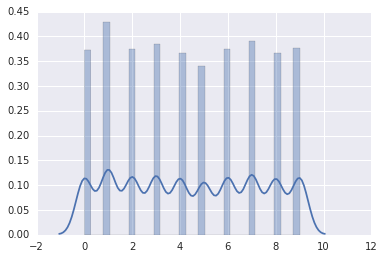

In [19]:
sns.distplot(train_set[1])

### Training data

In [39]:
x_tr = train_set[0]
y_tr = train_set[1]

In [40]:
x_tr.shape

(50000, 784)

In [41]:
28*28

784

In [43]:
x = x_tr[0]

In [44]:
type(x)

numpy.ndarray

In [45]:
x.shape

(784,)

In [46]:
x.shape = (28,28)

In [47]:
x.shape

(28, 28)

In [48]:
import pylab as plt
import PIL

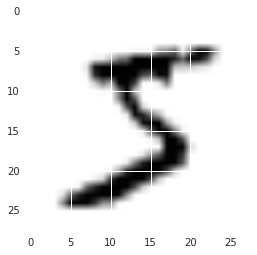

In [49]:
plt.imshow(x)

In [50]:
y = y_tr[0]
y

5

### shared data로 다루기

#### 참고 : shared_variable 관련 [4]
* https://github.com/songorithm/ML/blob/master/part1/study06/PKG/20150803theano_moreexample_sejinpark.ipynb

In [51]:
def shared_dataset(data_xy):
    """ Function that loads the dataset into shared variables
    
    The reason we store our dataset in shared variables is to allow
    Theano to copy it into the GPU memory (when code is run on GPU).
    Since copying data into the GPU is slow, copying a minibatch everytime
    is needed (the default behaviour if the data is not in a shared
    variable) would lead to a large decrease in performance.
    """
    data_x, data_y = data_xy
    shared_x = theano.shared(numpy.asarray(data_x, dtype=theano.config.floatX)) 
    shared_y = theano.shared(numpy.asarray(data_y, dtype=theano.config.floatX))
    # When storing data on the GPU it has to be stored as floats
    # therefore we will store the labels as ‘‘floatX‘‘ as well
    # (‘‘shared_y‘‘ does exactly that). But during our computations
    # we need them as ints (we use labels as index, and if they are
    # floats it doesn’t make sense) therefore instead of returning
    # ‘‘shared_y‘‘ we will have to cast it to int. This little hack
    # lets us get around this issue
    return shared_x, T.cast(shared_y, 'int32')

In [52]:
import theano
import theano.tensor as T

test_set_x, test_set_y = shared_dataset(test_set)
valid_set_x, valid_set_y = shared_dataset(valid_set)
train_set_x, train_set_y = shared_dataset(train_set)

batch_size = 500 # size of the minibatch

# accessing the third minibatch of the training set
data  = train_set_x[2 * 500: 3 * 500]
label = train_set_y[2 * 500: 3 * 500]

# 3.3 Notation

* 3.3.1 Dataset notation
* 3.3.2 Math Conventions
* 3.3.3 List of Symbols and acronyms
* 3.3.4 Python Namespaces

## 3.3.1 Dataset notation

* D : data sets
    - D_train
    - D_valid
    - D_test
* (x^(i), y^(i)) 
    - x^(i) ∈ R^D is thus the i-th training example of dimensionality D.
    - y^(i) ∈ {0,...,L} is the i-th label assigned to input x^(i).

## 3.3.2 Math Conventions

<img src="figures/cap3.2.png" width=600 />

<img src="figures/cap3.3.png" width=600 />

## 3.3.3 List of Symbols and acronyms

<img src="figures/cap3.4.png" width=600 />

## 3.3.4 Python Namespaces

In [53]:
import theano
import theano.tensor as T
import numpy

# 3.4 A Primer on Supervised Optimization for Deep Learning

* 3.4.1 Learning a Classifier
* 3.4.2 Stochastic Gradient Descent
* 3.4.3 Regularization 
* 3.4.5 Recap

This chapter reviews the basics of supervised learning for classification models, and covers the minibatch stochastic gradient descent algorithm that is used to fine-tune many of the models in the Deep Learning Tutorials.

## 3.4.1 Learning a Classifier

* Zero-One Loss
* Negative Log-Likelihood Loss

### Zero-One Loss

#### 참고 :

<img src="http://fa.bianp.net/talks/trento_may_2015/img/logistic.svg" width=600 />

<img src="figures/cap3.5.png" width=600 />

<img src="figures/cap3.6.png" width=600 />

In [ ]:
# zero_one_loss is a Theano variable representing a symbolic
# expression of the zero one loss ; to get the actual value this
# symbolic expression has to be compiled into a Theano function (see # the Theano tutorial for more details)
zero_one_loss = T.sum(T.neq(T.argmax(p_y_given_x), y))

#### 참고 : symbolic expression [5]
* http://deeplearning.net/software/theano/tutorial/adding.html

### Negative Log-Likelihood Loss

Since the zero-one loss is not differentiable, optimizing it for large models (thousands or millions of parameters) is prohibitively expensive (computationally). We thus maximize the log-likelihood of our classifier given all the labels in a training set.

#### 참고 :
<img src="https://camo.githubusercontent.com/324ca022a81b5a3514b44acc1cba4947c4ba8f25/687474703a2f2f7777772e6e6362692e6e6c6d2e6e69682e676f762f436c6173732f4e41574249532f4d6f64756c65732f5068796c6f67656e65746963732f696d616765732f7068796c6f6e7634382e676966" />

<img src="https://camo.githubusercontent.com/0d6d5018279ccfbebfba5546ea946945dac96171/687474703a2f2f646f632e6f70656e7475726e732e6f72672f6f70656e7475726e732d302e31332e322f646f632f68746d6c2f5265666572656e636547756964652f6f75747075742f4f70656e5455524e535f5265666572656e63654775696465313937782e706e67" />

<img src="https://camo.githubusercontent.com/bca2dcfc7ae5f35d6195018a3bdb250828692598/687474703a2f2f7374617467656e2e696f702e6b636c2e61632e756b2f6d656469612f6d6c312e676966" />

#### log-likelihood

<img src="figures/cap3.7.png" width=600 />

* The likelihood of the correct class is not the same as the number of right predictions, but from the point of view of a randomly initialized classifier they are pretty similar. 
* Remember that likelihood and zero-one loss are different objectives; you should see that they are corralated on the validation set but sometimes one will rise while the other falls, or vice-versa.

#### negative log-likelihood

<img src="figures/cap3.8.png" width=600 />

In [ ]:
# NLL is a symbolic variable ; to get the actual value of NLL, this symbolic # expression has to be compiled into a Theano function (see the Theano
# tutorial for more details)
NLL = -T.sum(T.log(p_y_given_x)[T.arange(y.shape[0]), y])
# note on syntax: T.arange(y.shape[0]) is a vector of integers [0,1,2,...,len(y)].
# Indexing a matrix M by the two vectors [0,1,...,K], [a,b,...,k] returns the
# elements M[0,a], M[1,b], ..., M[K,k] as a vector.  Here, we use this
# syntax to retrieve the log-probability of the correct labels, y.

## 3.4.2 Stochastic Gradient Descent

#### 참고 [2]

- http://vision.stanford.edu/teaching/cs231n/slides/lecture4.pdf

### 슈도코드

#### gradient descent

In [ ]:
# GRADIENT DESCENT
while True:
    loss = f(params)
    d_loss_wrt_params = ... # compute gradient 
    params -= learning_rate * d_loss_wrt_params 
    if <stopping condition is met>:
        return params

#### Stochastic gradient descent

In [ ]:
# STOCHASTIC GRADIENT DESCENT
for (x_i,y_i) in training_set:
                            # imagine an infinite generator
                            # that may repeat examples (if there is only a finite training
    loss = f(params, x_i, y_i) 
    d_loss_wrt_params = ... # compute gradient 
    params -= learning_rate * d_loss_wrt_params 
    if <stopping condition is met>:
        return params

#### minibatch SGD

In [ ]:
for (x_batch,y_batch) in train_batches:
                            # imagine an infinite generator
                            # that may repeat examples
    loss = f(params, x_batch, y_batch)
    d_loss_wrt_params = ... # compute gradient using theano 
    params -= learning_rate * d_loss_wrt_params
    if <stopping condition is met>: 
        return params

### Theano 구현

All code-blocks above show pseudocode of how the algorithm looks like. Implementing such algorithm in Theano can be done as follows :

In [ ]:
# Minibatch Stochastic Gradient Descent

# assume loss is a symbolic description of the loss function given
# the symbolic variables params (shared variable), x_batch, y_batch;

# compute gradient of loss with respect to params
d_loss_wrt_params = T.grad(loss, params)

# compile the MSGD step into a theano function
updates = [(params, params - learning_rate * d_loss_wrt_params)]
MSGD = theano.function([x_batch,y_batch], loss, updates=updates)

for (x_batch, y_batch) in train_batches:
    # here x_batch and y_batch are elements of train_batches and
    # therefore numpy arrays; function MSGD also updates the params 
    print('Current loss is ', MSGD(x_batch, y_batch))
    if stopping_condition_is_met:
        return params

## 3.4.3 Regularization 

* L1 and L2 regularization
* Early-Stopping

### L1 and L2 regularization

<img src="figures/cap3.9.png" width=600 />

#### 참고 [2] : 

<img src="https://github.com/songorithm/ML/raw/f9f2c631f14613f5051eed28f70ffeb130d9c219/part2/study04/dml07/figures/cap7.21.png" width=600 />

<img src="https://camo.githubusercontent.com/0403ea65eb50f1635201e850814948aa886780bd/687474703a2f2f796f73696e736b692e636f6d2f6d6c737331322f6d656469612f736c696465732f4d4c53532d323031322d46756b756d697a752d4b65726e656c2d4d6574686f64732d666f722d537461746973746963616c2d4c6561726e696e675f3035302e706e67" width=600 />

<img src="https://camo.githubusercontent.com/4505f4644d793302ebb4efc7719b1e6f109520b8/687474703a2f2f7777772e616c676c69622e6e65742f64617461616e616c797369732f692f617274305f747261696e7265672e676966" width=600 />

The code block below shows how to compute the loss in python when it contains both a L1 regularization term weighted by λ1 and L2 regularization term weighted by λ2

In [ ]:
# symbolic Theano variable that represents the L1 regularization term
L1 = T.sum(abs(param))

# symbolic Theano variable that represents the squared L2 term
L2_sqr = T.sum(param ** 2)

# the loss
loss = NLL + lambda_1 * L1 + lambda_2 * L2

### Early-Stopping

#### 참고 [2] : 

<img src="https://github.com/songorithm/ML/raw/f9f2c631f14613f5051eed28f70ffeb130d9c219/part2/study04/dml07/figures/cap7.44.png" width=600 />

<img src="https://github.com/songorithm/ML/raw/f9f2c631f14613f5051eed28f70ffeb130d9c219/part2/study04/dml07/figures/cap7.48.png" width=600 />

The choice of when to stop is a judgement call and a few heuristics exist, but these tutorials will make use of a strategy based on a geometrically increasing amount of patience.

In [ ]:
# early-stopping parameters
patience = 5000 # look as this many examples regardless 
patience_increase = 2 # wait this much longer when a new best is
                        # found
improvement_threshold = 0.995 # a relative improvement of this much is
                               # considered significant
validation_frequency = min(n_train_batches, patience/2) # go through this many
                              # minibatches before checking the network
                              # on the validation set; in this case we
                              # check every epoch
best_params = None
best_validation_loss = numpy.inf
test_score = 0.
start_time = time.clock()

done_looping = False
epoch = 0

while (epoch < n_epochs) and (not done_looping):
    # Report "1" for first epoch, "n_epochs" for last epoch
    epoch = epoch + 1
    for minibatch_index in xrange(n_train_batches):

        d_loss_wrt_params = ... # compute gradient
        params -= learning_rate * d_loss_wrt_params # gradient descent
        
        # iteration number. We want it to start at 0.
        iter = (epoch - 1) * n_train_batches + minibatch_index
        # note that if we do ‘iter % validation_frequency‘ it will be 
        # true for iter = 0 which we do not want. We want it true for 
        # iter = validation_frequency - 1.
        if (iter + 1) % validation_frequency == 0:

            this_validation_loss = ... # compute zero-one loss on validation set 
            
            if this_validation_loss < best_validation_loss:
                                       
                # improve patience if loss improvement is good enough
                if this_validation_loss < best_validation_loss * improvement_threshold:
                    patience = max(patience, iter * patience_increase)
                
                best_params = copy.deepcopy(params)
                best_validation_loss = this_validation_loss

        if patience <= iter:
            done_looping = True
            break

# POSTCONDITION :
# best_params refers to the best out-of-sample parameters observed during the optimization

## 3.4.4 Testing

## 3.4.5 Recap

# 3.5 Theano/Python Tips

* 3.5.1 Loading and Saving Models
* 3.5.2 Plotting Intermediate Results

## 3.5.1 Loading and Saving Models

* Pickle the numpy ndarrays from your shared variables
* Do not pickle your training or test functions for long-term storage

### Pickle the numpy ndarrays from your shared variables

In [ ]:
import cPickle
save_file = open('path', 'wb') # this will overwrite current contents
cPickle.dump(w.get_value(borrow=True), save_file, -1) # the -1 is for HIGHEST_PROTOCOL 
cPickle.dump(v.get_value(borrow=True), save_file, -1) # .. and it triggers much more e 
cPickle.dump(u.get_value(borrow=True), save_file, -1) # .. storage than numpy’s defaul 
save_file.close()

In [ ]:
save_file = open('path')
w.set_value(cPickle.load(save_file), borrow=True) 
v.set_value(cPickle.load(save_file), borrow=True) 
u.set_value(cPickle.load(save_file), borrow=True

### Do not pickle your training or test functions for long-term storage

## 3.5.2 Plotting Intermediate Results

# 참고자료 

* [1] Deep Learning Tutorial - http://deeplearning.net/tutorial/deeplearning.pdf
* [2] Optimization, higher-level representations, image features - http://vision.stanford.edu/teaching/cs231n/slides/lecture4.pdf
* [3] 7 Regularization (Bengio's book) - http://goodfeli.github.io/dlbook/version-2015-10-17/contents/regularization.html 
* [4] theano 튜토리얼 : More Examples - https://github.com/songorithm/ML/blob/master/part1/study06/PKG/20150803theano_moreexample_sejinpark.ipynb
* [5] theano 튜토리얼 : symbolic expression - http://deeplearning.net/software/theano/tutorial/adding.html